## Рекомендаційна система

Ідея рекомендаційних систем на основі найближчого сусіда – використовувати переваги деякої групи людей, схожих на даного користувача, щоб рекомендувати йому щось.

Така модель має багато застосувань:
    
   * рекомендація товарів інтернет-магазинів
   * рекомендація музики чи фільмів
   * рекомендація людей/контенту у соціальних мережах

Природний спосіб отримати рекомендацію про щось - запитати думку про це у друзів чи будь-яких людей, яким подобається те саме, що й вам. Цю ідею можна використовувати і для машини: для кожної людини алгоритм проглядає велику групу людей і шукає в ній підгрупу зі схожим на дану людину смаком. Далі створюється список того, що подобається цим людям, а потім людині рекомендуються пропозиції з цього списку. Такий алгоритм називається алгоритмом **колаборативної фільтрації**.

In [1]:
critics = {'Ліза Іванова': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Ігор Петренко': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Міша Майдан': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Клавдія Мороз': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Аня Товкач': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Матвій Чорний': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Сергій Вацак': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

In [2]:
import pprint
pprint.pprint(critics)

{'Ігор Петренко': {'Just My Luck': 1.5,
                   'Lady in the Water': 3.0,
                   'Snakes on a Plane': 3.5,
                   'Superman Returns': 5.0,
                   'The Night Listener': 3.0,
                   'You, Me and Dupree': 3.5},
 'Аня Товкач': {'Just My Luck': 2.0,
                'Lady in the Water': 3.0,
                'Snakes on a Plane': 4.0,
                'Superman Returns': 3.0,
                'The Night Listener': 3.0,
                'You, Me and Dupree': 2.0},
 'Клавдія Мороз': {'Just My Luck': 3.0,
                   'Snakes on a Plane': 3.5,
                   'Superman Returns': 4.0,
                   'The Night Listener': 4.5,
                   'You, Me and Dupree': 2.5},
 'Ліза Іванова': {'Just My Luck': 3.0,
                  'Lady in the Water': 2.5,
                  'Snakes on a Plane': 3.5,
                  'Superman Returns': 3.5,
                  'The Night Listener': 3.0,
                  'You, Me and Dupree': 2.5},
 

In [3]:
def similar_films(critics, p1, p2):
    """Виводимо список спільних фільів для двох користувачів"""
    
    f1 = set(critics[p1].keys())
    f2 = set(critics[p2].keys())
    
    return list(f1 & f2)

similar_films(critics, 'Ігор Петренко', 'Міша Майдан')

['The Night Listener',
 'Snakes on a Plane',
 'Lady in the Water',
 'Superman Returns']

In [4]:
similar_films(critics, 'Ігор Петренко', 'Матвій Чорний')

['The Night Listener',
 'Superman Returns',
 'Lady in the Water',
 'Snakes on a Plane',
 'You, Me and Dupree']

Щоб виділити підгрупу людей зі схожим смаком, необхідно якось визначити, наскільки люди схожі. У нашому випадку ми порівнюватимемо оцінки людей у ​​однакових фільмів. Ми розглянемо два способи порівняння. За допомогою
- відстані Евкліда
- кореляції Пірсона

Евклідова відстань $x = (x_1, x_2, ... , x_n)$ и $y = (y_1, y_2, ... , y_n)$ :

\begin{equation}
d(x, y) = \sqrt{\sum_{i = 1}^n (x_i - y_i)^2}
\end{equation}

In [5]:
import math
def score(critics, p1, p2):
    """Подібність між смаками двох людей"""
    
    films = similar_films(critics, p1, p2)
    
    if len(films) == 0:
        return 0
    
    distance = 0
    
    for film in films:
        distance += (critics[p1][film] - critics[p2][film])**2
        
    score = 1 / (1 + math.sqrt(distance))
    
    return score
        
score(critics, 'Ігор Петренко', 'Міша Майдан')

0.3405424265831667

In [6]:
score(critics, 'Ігор Петренко', 'Матвій Чорний')

0.6666666666666666

In [ ]:
def similar_people(critics, p1):
    """Список людей із схожими смаками (score)"""
    d = []
    for person in critics:
        d.append((person,  round(score(critics, p1, person), 2) ))
        
    print(sorted(d, key=lambda x: x[1]))
    
similar_people(critics, 'Ігор Петренко')  

[('Сергій Вацак', 0.26), ('Клавдія Мороз', 0.28), ('Аня Товкач', 0.28), ('Ліза Іванова', 0.29), ('Міша Майдан', 0.34), ('Матвій Чорний', 0.67), ('Ігор Петренко', 1.0)]


Відстань, обчислена за цією формулою, буде тим меншою, чим більша схожість людей (що ближче точки). Нам же потрібна функція, значення якої буде, навпаки, велике, якщо люди схожі один на одного. Тобто схожість більша (від 0 до 1), якщо точки ближче один до одного


Для цього будемо використовувати функцію "схожості" у такому вигляді:
\begin{equation}
\text{similarity }(x, y) = \dfrac{1}{1 + d(x, y)},
\end{equation}

Інший спосіб визначати ступінь схожості – використовувати коефіцієнт кореляції **Пірсона**. Цей коефіцієнт показує, наскільки два набори даних добре лягають на пряму.

\begin{equation}
    \text{corr}(x, y) = \dfrac{\sum_{i = 1}^n (x_i - \overline x) (y_i - \overline y)}{\sqrt{\sum_{i = 1}^n (x_i - \overline x)^2 \sum_{i = 1}^n (y_i - \overline y)^2}}
\end{equation}

Коефіцієнт кореляції рангу **Спірмена** — непараметрична міра статистичної залежності між двома змінними; названий на честь Чарльза Спірмена. Він оцінює наскільки добре можна описати відношення між двома змінними за допомогою монотонної функції. 

Якщо немає повторних значень даних, то коефіцієнт Спірмена дорівнює 1 або −1, це відбувається коли кожна змінна є монотонною функцією від іншої змінної. Коефіцієнт кореляції, як і будь-яке обчислення кореляції, підходить для безперервних та дискретних змінних, у тому числі порядкових.

In [ ]:
from scipy.stats import pearsonr, spearmanr
def score_2(critics, p1, p2):
    """Подібність на основі кореляції"""
    
    films = similar_films(critics, p1, p2)
    
    if len(films) == 0:
        return 0
    l1, l2, = [], []
    for film in films:
        l1.append(critics[p1][film])
        l2.append(critics[p2][film])
    
    pearsonr(l1, l2)
    
#     print(pearsonr(l1, l2)[0])
#     print(spearmanr(l1, l2)[0])
    
    return pearsonr(l1, l2)[0]
        
score_2(critics, 'Ігор Петренко', 'Міша Майдан')    
        

0.20459830184114208

In [ ]:
def similar_people(critics, p1):
    """Список людей із схожими смаками (score)"""
    d = []
    for person in critics:
        d.append((person,  round(score_2(critics, p1, person), 2) ))
        
    print(sorted(d, key=lambda x: x[1]))
    
similar_people(critics, 'Ігор Петренко')  

[('Міша Майдан', 0.2), ('Клавдія Мороз', 0.31), ('Сергій Вацак', 0.38), ('Ліза Іванова', 0.4), ('Аня Товкач', 0.41), ('Матвій Чорний', 0.96), ('Ігор Петренко', 1.0)]


Для рекомендаційних бібліотек є готові рішення. Наприклад: https://surprise.readthedocs.io/en/stable/

# Апроксимація функцій

https://machinelearningmastery.com/curve-fitting-with-python/

https://personal.math.ubc.ca/~pwalls/math-python/linear-algebra/linear-algebra-scipy/

Розглянемо складну математичну функцію на відрізку

f(x) = sin(x / 5) exp(x / 10) + 5 exp(-x / 2)

Вона може описувати, наприклад, залежність оцінок, які виставляють певному ґатунку вина експерти, залежно від віку цього вина. По суті завдання машинного навчання полягає в тому, щоб наблизити складну залежність за допомогою функції. Як варіант, можна наблизити цю функцію за допомогою многочленів

In [ ]:
%matplotlib inline
import math
import scipy
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.) 

In [ ]:
x = np.arange(1, 16, 0.1)
y = list(map(f, x))

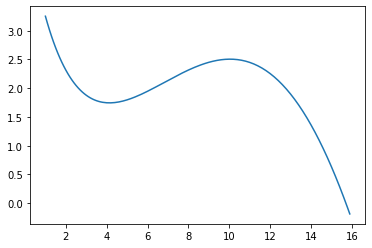

<Figure size 432x288 with 1 Axes>

In [ ]:
plt.plot(x, y)

In [ ]:
x_points = [2, 4, 8, 10,  16]

def get_matrixe(x_points):
    """Матриця з многочленів степеня len(x_points)"""
    matrixe = []
    
    for x in x_points:
        row = []
        for i in range(len(x_points)):
            row.append(x**i)
            
    return matrixe

A = get_matrix(x_points)
A

array([[    1,     2,     4,     8,    16],
       [    1,     4,    16,    64,   256],
       [    1,     8,    64,   512,  4096],
       [    1,    10,   100,  1000, 10000],
       [    1,    16,   256,  4096, 65536]])

In [ ]:
A

array([[  1,   2,   4],
       [  1,   8,  64],
       [  1,  16, 256]])

In [ ]:
y_points = list(map(f, x_points))
y_points

[2.3150338432311584,
 1.7468459495903677,
 2.316170159053224,
 2.5054164070002463,
 -0.28745171200358255]

In [ ]:
w = np.linalg.solve(A, y_points)
w

array([ 4.29909673e+00, -1.47342684e+00,  2.75243499e-01, -1.79451851e-02,
        3.36142323e-04])

In [ ]:
def get_app(w, x_points):
    y = []
    
    for x in x_points:
        y_row = 0
        
        for j in range(len(w)):
            y_row += w[j] * (x**j)
        y.append(y_row)
        
    return y


y_app = get_app(w, x)

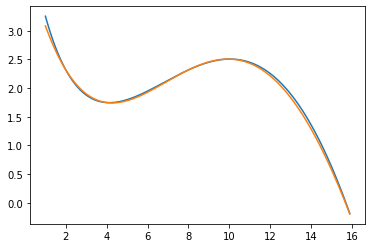

<Figure size 432x288 with 1 Axes>

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y_app)